In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Upload file (kalau bentuknya CSV)
from google.colab import files
uploaded = files.upload()

# Load data
import io
df = pd.read_csv('/content/WA_Marketing-Campaign.csv')
df.head()
# Lihat 5 baris pertama
df.head()


Saving WA_Marketing-Campaign.csv to WA_Marketing-Campaign (4).csv


,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
0,1,Medium,1,4,3,1,33.73
1,1,Medium,1,4,3,2,35.67
2,1,Medium,1,4,3,3,29.03
3,1,Medium,1,4,3,4,39.25
4,1,Medium,2,5,2,1,27.81


In [16]:
# Tampilkan 5 baris pertama
df.head()

# Lihat ringkasan struktur data
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MarketID          548 non-null    int64  
 1   MarketSize        548 non-null    object 
 2   LocationID        548 non-null    int64  
 3   AgeOfStore        548 non-null    int64  
 4   Promotion         548 non-null    int64  
 5   week              548 non-null    int64  
 6   SalesInThousands  548 non-null    float64
dtypes: float64(1), int64(5), object(1)
memory usage: 30.1+ KB


In [17]:
from scipy import stats

# Buat grup berdasarkan jenis promosi
promo_1 = df[df['Promotion'] == 1]['SalesInThousands']
promo_2 = df[df['Promotion'] == 2]['SalesInThousands']
promo_3 = df[df['Promotion'] == 3]['SalesInThousands']

# Lakukan One-Way ANOVA
f_stat, p_value = stats.f_oneway(promo_1, promo_2, promo_3)

print("F-Statistic:", f_stat)
print("p-value:", p_value)


F-Statistic: 21.953485793080677
p-value: 6.765849261408714e-10


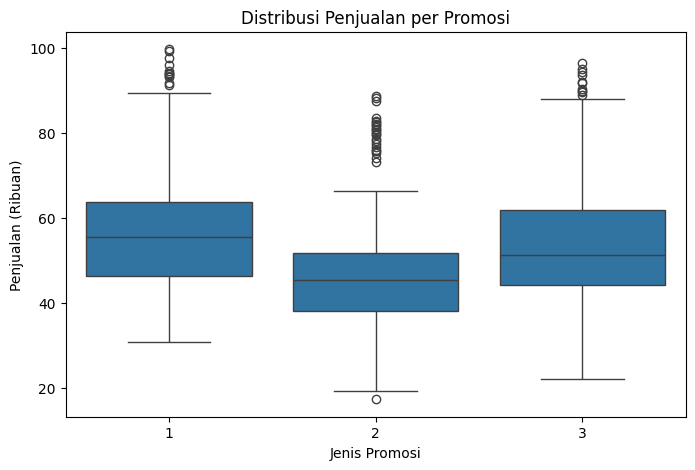

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.boxplot(x='Promotion', y='SalesInThousands', data=df)
plt.title('Distribusi Penjualan per Promosi')
plt.xlabel('Jenis Promosi')
plt.ylabel('Penjualan (Ribuan)')
plt.show()


In [19]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog=df['SalesInThousands'],
                          groups=df['Promotion'],
                          alpha=0.05)

print(tukey)


 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     1      2 -10.7696    0.0 -14.7738 -6.7654   True
     1      3  -2.7345 0.2444  -6.7388  1.2697  False
     2      3   8.0351    0.0   4.1208 11.9493   True
-----------------------------------------------------


In [20]:
df.groupby('Promotion')['SalesInThousands'].agg(['count', 'mean', 'std'])


,count,mean,std
Promotion,,,
1,172,58.099012,16.553782
2,188,47.329415,15.108955
3,188,55.364468,16.766231
